**Amazon  Review  Analysis**

**a)**

In [2]:
import pyreadr
amazon = pyreadr.read_r("/Users/Troy/Desktop/STA141C/Amazon.RData")

In [3]:
#list(amazon.keys()) ##list the keys of the dictionary 

In [4]:
#amazon["dat"] ##visualize the key with "review" in a data set  

In [5]:
reviews = amazon["dat"]["review"] #save the "review" column as reviews 

In [6]:
reviews

0       My husband and I selected the Diaper "Champ" m...
1       I have had a diaper genie for almost 4 years s...
2       We loved this pail at first. The mechanism see...
3       Bad construction is my main issue. My husband ...
4       Diaper catches and jams in the well and that i...
5       After 2 and half years I still can\'t get the ...
6       This is the worst diaper pail ever!  It was gr...
7       Can\'t get the smell of rank diapers out of th...
8       Overrated, odor is bad. I changed to Gallon zi...
9       My 8 year old yellow lab was able to get the t...
10      I believed the reviews of this product, and bo...
11      We got the Diaper Champ because we thought it ...
12      I got this pail because I felt it was good tha...
13      Worst diaper pale ever!!  I\'ve had mine for 2...
14      This thing freakin\' stinks. Literally. I chan...
15      After reading how great this product was on th...
16      The Diaper Champ is TERRIBLE at keeping the sm...
17      It\'s 

**b)**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer 
stemmer = FrenchStemmer() 
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return(stemmer.stem(w) for w in analyzer(doc))
#stemmer function

In [42]:
vec = CountVectorizer(analyzer = stemmed_words)

**c)**

In [102]:
doc_mat = vec.fit_transform(reviews)
doc_mat #document frequency matrix

<1312x5186 sparse matrix of type '<class 'numpy.int64'>'
	with 73528 stored elements in Compressed Sparse Row format>

**d)**

In [55]:
tfidf_vec = TfidfVectorizer(token_pattern="[a-z]{3,15}")

In [59]:
tfidf_mat = tfidf_vec.fit_transform(reviews)
tfidf_mat #term frequency inverse document frequency matrix

<1312x5806 sparse matrix of type '<class 'numpy.float64'>'
	with 63831 stored elements in Compressed Sparse Row format>

**e)**

In [65]:
ratings = amazon["dat"]["rating"]
ratings.value_counts() #table

5    656
1    656
Name: rating, dtype: int64

***Answer***

There are two rating values present within the dataset, which are represented by "1" and "5". In addition there are 656 ratings of "5" and 656 ratings of "1". 

**f)**

*1. Kernel PCA*

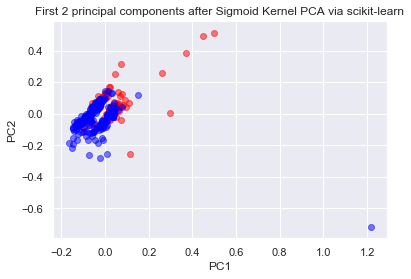

In [138]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

scikit_kpca = KernelPCA(n_components=2, kernel='sigmoid', gamma=10) ## NOTE: 2 components
X_skernpca = scikit_kpca.fit_transform(doc_mat)

plt.figure()
plt.scatter(X_skernpca[ratings == 1, 0], X_skernpca[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[ratings == 5, 0], X_skernpca[ratings == 5, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Sigmoid Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

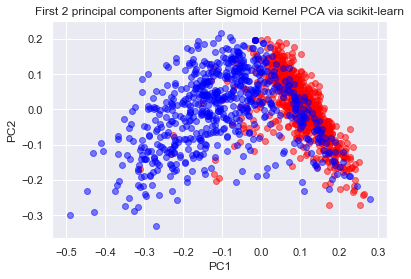

In [139]:
scikit_kpca = KernelPCA(n_components=2, kernel='cosine', gamma=10) ## NOTE: 2 components
X_skernpca = scikit_kpca.fit_transform(tfidf_mat)

plt.figure()
plt.scatter(X_skernpca[ratings == 1, 0], X_skernpca[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(X_skernpca[ratings == 5, 0], X_skernpca[ratings == 5, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Sigmoid Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

*2. Multi-Dimensional Scaling*

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() ## Seaborn is another package for visualization and plotting https://seaborn.pydata.org/
import numpy as np

In [120]:
dense_doc = doc_mat.toarray()
dense_tfidf = tfidf_mat.toarray()

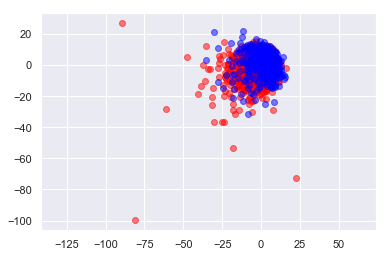

In [140]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='euclidean', random_state=1)
out = model.fit_transform(dense_doc) 
plt.scatter(out[ratings == 1, 0], out[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(out[ratings == 5, 0], out[ratings == 5, 1], color='blue', alpha=0.5)
plt.axis('equal');

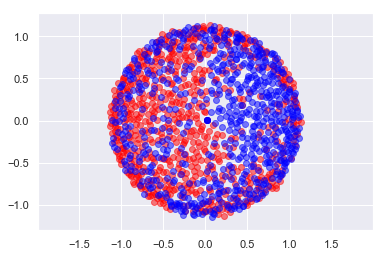

In [141]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='euclidean', random_state=1)
out = model.fit_transform(dense_tfidf)
plt.scatter(out[ratings == 1, 0], out[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(out[ratings == 5, 0], out[ratings == 5, 1], color='blue', alpha=0.5)
plt.axis('equal');

*3. Isomap*

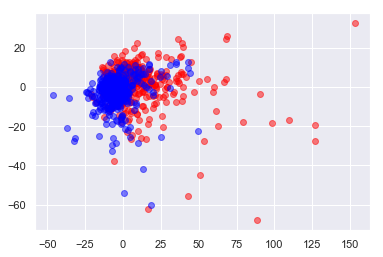

In [142]:
from sklearn.manifold import Isomap

model = Isomap(n_components=2)
proj = model.fit_transform(doc_mat)
plt.scatter(proj[ratings == 1, 0], proj[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(proj[ratings == 5, 0], proj[ratings == 5, 1], color='blue', alpha=0.5)

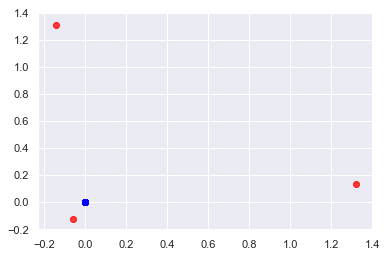

In [143]:
from sklearn.manifold import Isomap

model = Isomap(n_components=2)
proj = model.fit_transform(dense_tfidf)
plt.scatter(proj[ratings == 1, 0], proj[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(proj[ratings == 5, 0], proj[ratings == 5, 1], color='blue', alpha=0.5)

*4. t-SNE* 

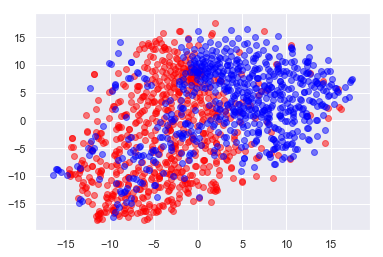

In [144]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(dense_doc)
plt.scatter(X_2d[ratings == 1, 0], X_2d[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(X_2d[ratings == 5, 0], X_2d[ratings == 5, 1], color='blue', alpha=0.5)

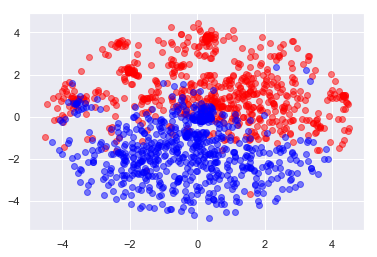

In [145]:
tsne = TSNE(n_components = 2, random_state = 0)
X_2d = tsne.fit_transform(dense_tfidf)
plt.scatter(X_2d[ratings == 1, 0], X_2d[ratings == 1, 1], color='red', alpha=0.5)
plt.scatter(X_2d[ratings == 5, 0], X_2d[ratings == 5, 1], color='blue', alpha=0.5)